In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Admission_Predict.csv')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Columns

* GRE Scores (Out of 340)(Aptitude)
* Research Experience(either 0 or 1)
* Chance of Admit(ranging from 0 to 1)

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
data.drop('Serial No.',axis=1,inplace=True)

In [8]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


{'whiskers': [<matplotlib.lines.Line2D at 0x259d323d890>,
 'caps': [<matplotlib.lines.Line2D at 0x259d323f290>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d31c2f90>],
 'medians': [<matplotlib.lines.Line2D at 0x259d324cc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d324d710>],
 'means': []}

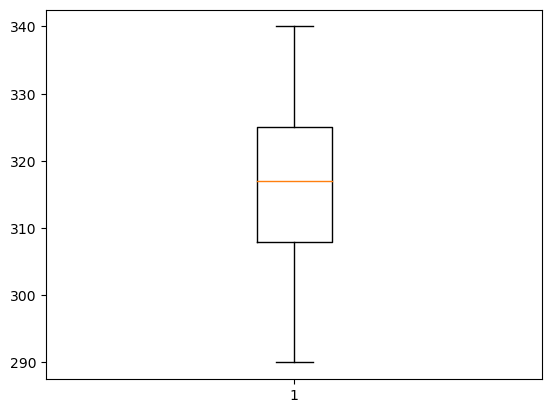

In [9]:
plt.boxplot(data['GRE Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x259d3b2b490>,
 'caps': [<matplotlib.lines.Line2D at 0x259d3b38bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d3b2aa50>],
 'medians': [<matplotlib.lines.Line2D at 0x259d3b3a190>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d3b3ac50>],
 'means': []}

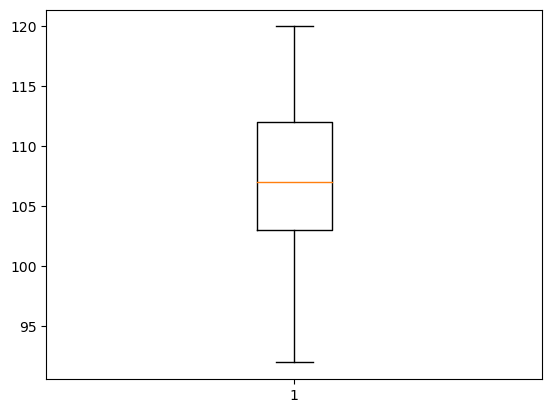

In [10]:
plt.boxplot(data['TOEFL Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x259d3b98990>,
 'caps': [<matplotlib.lines.Line2D at 0x259d3b9a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d3b8fd10>],
 'medians': [<matplotlib.lines.Line2D at 0x259d3b9b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d3ba4390>],
 'means': []}

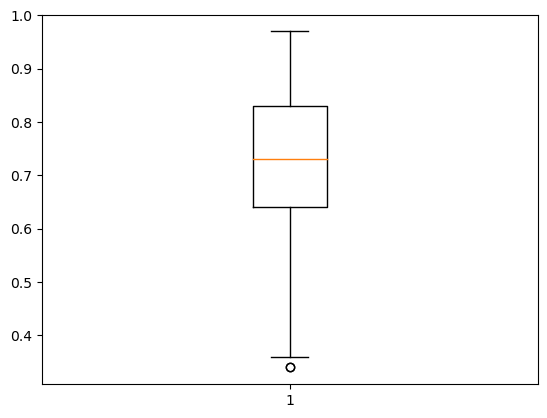

In [11]:
plt.boxplot(data['Chance of Admit '])

{'whiskers': [<matplotlib.lines.Line2D at 0x259d4b9ead0>,
 'caps': [<matplotlib.lines.Line2D at 0x259d4be8690>,
 'boxes': [<matplotlib.lines.Line2D at 0x259d4bda2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x259d4be9cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x259d4bea6d0>],
 'means': []}

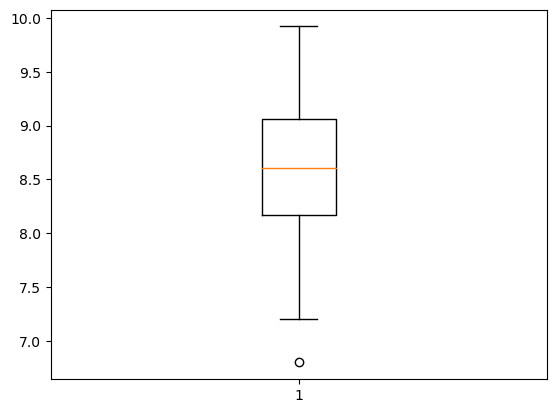

In [12]:
plt.boxplot(data['CGPA'])

In [13]:
correlation = data.corr()
correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

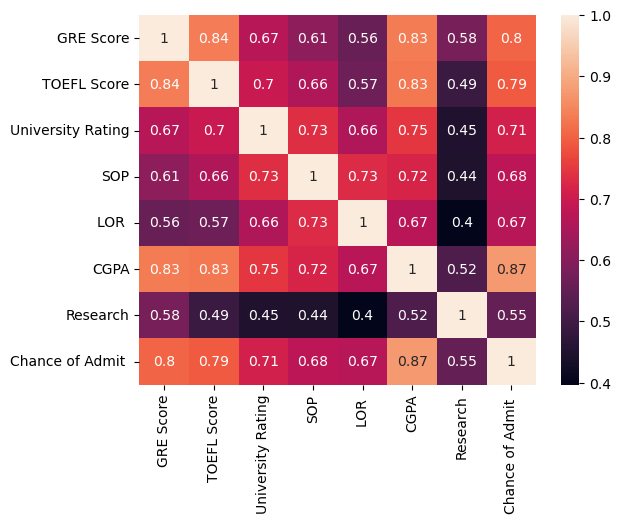

In [14]:
sns.heatmap(correlation, annot=True)

#### Sample scatter plot showing relation between CGPA and Chance of Admit

Text(0, 0.5, 'chance of admit')

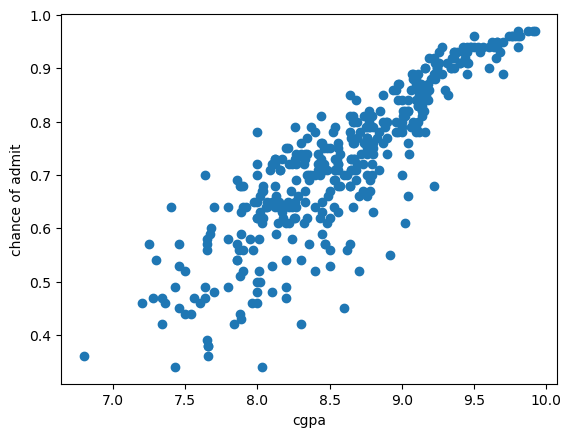

In [15]:
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.xlabel('cgpa')
plt.ylabel('chance of admit')

Text(0, 0.5, 'chance of admit')

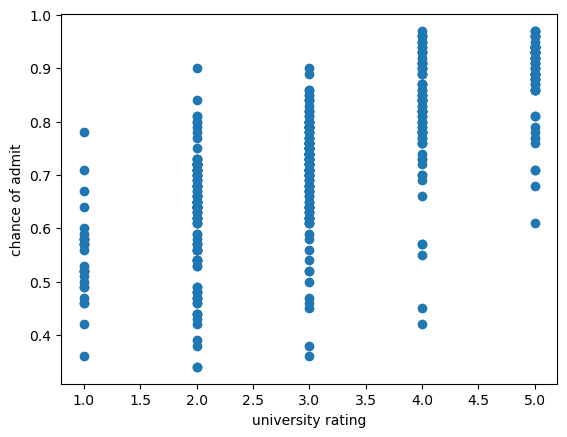

In [16]:
plt.scatter(data['University Rating'],data['Chance of Admit '])
plt.xlabel('university rating')
plt.ylabel('chance of admit')

### Model creation and training

In [17]:
x=data.drop('Chance of Admit ', axis=1)
y=data['Chance of Admit ']

In [18]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [19]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=23)

In [21]:
x_train.shape, x_test.shape

((320, 7), (80, 7))

In [22]:
y_train.shape, y_test.shape

((320,), (80,))

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)  # training the model

LinearRegression()

In [24]:
model.coef_  #slope of the each columns

array([0.00195942, 0.00261344, 0.00840984, 0.00118867, 0.01662844,
       0.11889927, 0.01808301])

In [25]:
model.intercept_

-1.29790150235465

### Model Performance

#### Checking for underfitting and overfitting

In [26]:
# testing score
model.score(x_test, y_test)

0.7393817181673339

In [27]:
# training score
model.score(x_train, y_train)

0.8144427567157715

In [28]:
y_pred = model.predict(x_test)

In [29]:
pd.DataFrame({'True values': y_test, 'Predicted values': y_pred})

,True values,Predicted values
133,0.79,0.793264
331,0.73,0.623077
167,0.64,0.642757
335,0.83,0.843480
239,0.59,0.530874
...,...,...
155,0.77,0.710218
74,0.74,0.764523
270,0.72,0.641204
216,0.91,0.858644


In [30]:
# Errors

mean_absolute_error(y_test, y_pred)

0.04930378418949351

In [31]:
mean_squared_error(y_test, y_pred)

0.004393336036548287

### Prediction

In [32]:
model.predict([[270,98,3,2,3,7.6,0]])

C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.46838589])

In [33]:
model.predict([[300,120,4.5,4,4,9,1]])

C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.80082669])

### Saving the model

In [34]:
import joblib

In [35]:
joblib.dump(model, 'lr_model') # saving

['lr_model']

In [36]:
# accessing

model_reloaded = joblib.load('lr_model')
model_reloaded.predict([[300,120,4.5,4,4,9,1]])

C:\Users\Muhammed Fahim\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.80082669])

array([0.10241854, 0.03267244, 0.01460965, 0.02818185, 0.02024942,
       0.79177848, 0.01008962])